In [1]:
import numpy as np
import matplotlib.pyplot as plt

np.set_printoptions(precision=5, suppress=True)

In [2]:
# Rows: observations, Columns: predictors
# For now it is just a sample dataset
from data_import_initial_analysis import build_X, column_names
import pandas as pd
df = pd.read_csv('data/train_FD001.txt', sep=r'\s+', header=None, names=column_names)
X, feature_cols, df_used = build_X(df, drop_constant=True)

print("Original Data:\n", X)

Original Data:
 [[ -0.0029   0.0002 643.66   ... 395.      38.5     23.0281]
 [  0.0016  -0.0001 644.04   ... 396.      38.53    23.0902]
 [  0.0014  -0.     643.39   ... 396.      38.49    23.1398]
 ...
 [ -0.0031  -0.0005 643.74   ... 397.      38.36    23.0258]
 [ -0.      -0.0004 644.04   ... 397.      38.26    23.0719]
 [  0.0007  -0.     643.75   ... 397.      38.42    22.9782]]


In [3]:
means = np.mean(X, axis=0)
stds = np.std(X, axis=0, ddof=1)
standardized_X = (X - means) / stds

print("Standardized Data:\n", standardized_X)

Standardized Data:
 [[-1.26276  0.83427 -0.21484 ... -1.53188  0.97333 -0.38548]
 [ 0.66741 -0.16685  1.10617 ... -0.57446  1.2719   0.56103]
 [ 0.58163  0.16685 -1.15345 ... -0.57446  0.87381  1.31701]
 ...
 [-1.34855 -1.50169  0.06327 ...  0.38297 -0.41999 -0.42053]
 [-0.01887 -1.16798  1.10617 ...  0.38297 -1.41521  0.28211]
 [ 0.28138  0.16685  0.09803 ...  0.38297  0.17715 -1.14603]]


In [4]:
covariance_matrix = np.cov(standardized_X, rowvar=False)
print("Covariance Matrix:\n", covariance_matrix)

Covariance Matrix:
 [[ 1.       0.01995 -0.13828  0.00112  0.07731 -0.02766 -0.1026  -0.05865
   0.0529  -0.01558 -0.04676 -0.06644 -0.01131 -0.05077 -0.01184  0.06505]
 [ 0.01995  1.      -0.11894  0.01938  0.05737 -0.01184  0.00691  0.16413
  -0.02456  0.0945   0.05601  0.14665 -0.00361  0.08391  0.02113 -0.1309 ]
 [-0.13828 -0.11894  1.       0.14566 -0.03581  0.08408  0.00505  0.26905
  -0.19253  0.10626  0.0092   0.28734  0.069    0.03234  0.09324  0.0819 ]
 [ 0.00112  0.01938  0.14566  1.      -0.06018  0.18266 -0.24636  0.34273
  -0.11981  0.15913 -0.20526  0.33154  0.05857  0.1782  -0.02601  0.03846]
 [ 0.07731  0.05737 -0.03581 -0.06018  1.       0.1208  -0.04306 -0.10632
  -0.01964 -0.04909  0.08398 -0.10883  0.01316 -0.19171 -0.05934 -0.01245]
 [-0.02766 -0.01184  0.08408  0.18266  0.1208   1.      -0.25228  0.48253
  -0.19286  0.32933 -0.17208  0.4915  -0.07277  0.25332 -0.05556  0.01941]
 [-0.1026   0.00691  0.00505 -0.24636 -0.04306 -0.25228  1.      -0.23548
  -0.16531 -

In [5]:
eigenvalues, eigenvectors = np.linalg.eigh(covariance_matrix)
eigenvalues = eigenvalues[::-1]
eigenvectors = eigenvectors[:, ::-1]
print("Eigenvalues:\n", eigenvalues)
print("Eigenvectors:\n", eigenvectors)

Eigenvalues:
 [3.62987 2.12338 1.38452 1.19641 1.09428 1.01056 0.95126 0.8865  0.76753
 0.71209 0.64753 0.55172 0.53708 0.40905 0.09565 0.00257]
Eigenvectors:
 [[-0.03258 -0.13555  0.25201  0.19123  0.01074 -0.75031  0.03286 -0.43001
   0.19943  0.22915  0.16595  0.10016 -0.00934 -0.00286  0.03819 -0.00412]
 [ 0.06563  0.10419  0.3048   0.27601 -0.54813  0.07783  0.50677  0.20118
   0.26429 -0.18661 -0.04557  0.1673  -0.05948  0.26696  0.04815 -0.00978]
 [ 0.15073  0.09649 -0.54575 -0.04634  0.23816  0.02723  0.22934  0.08143
   0.4434   0.44594 -0.02932  0.23626  0.05894  0.30541  0.04723  0.0129 ]
 [ 0.24228 -0.09067 -0.12026 -0.07935  0.04578 -0.03212  0.52825 -0.36091
  -0.57735  0.0664  -0.35607 -0.0054  -0.15848  0.08221  0.05779 -0.01092]
 [-0.06113 -0.05146  0.10115  0.70027  0.3575   0.01244  0.1072   0.28788
  -0.13778  0.15805 -0.23463 -0.12146  0.36219 -0.14375  0.07104 -0.00398]
 [ 0.32067 -0.00464  0.03885  0.26691  0.24986 -0.00431 -0.20505  0.16572
  -0.31592 -0.15051  

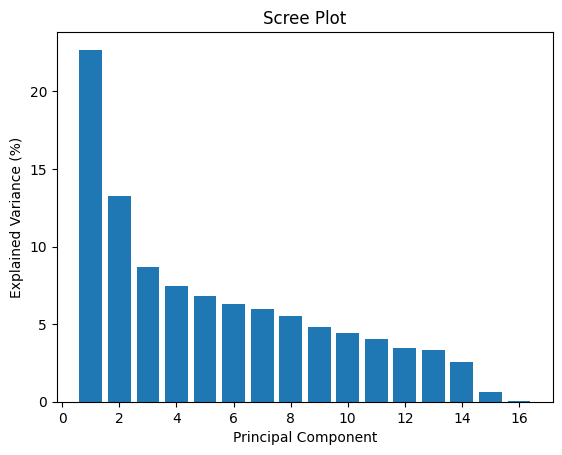

In [6]:
# Scree plot
explained_var = eigenvalues / eigenvalues.sum()
plt.bar(range(1, len(explained_var)+1), explained_var*100)
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance (%)')
plt.title('Scree Plot')
plt.show()

The scree plot shows that the first two principal components explain the majority of the variance in the data (about 96%). This means that most of the information in the original variables can be represented in just two dimensions.

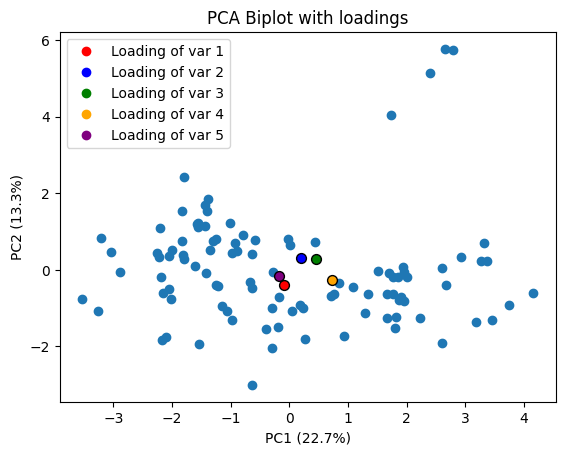

In [7]:
scores = np.dot(standardized_X, eigenvectors)

plt.scatter(scores[:,0], scores[:,1])
colors = ['red', 'blue', 'green', 'orange', 'purple']

for i, color in enumerate(colors):
    x = eigenvectors[i,0]*3
    y = eigenvectors[i,1]*3
    plt.scatter(x, y, color=color, s=50, edgecolor='black')

for i, color in enumerate(colors):
    plt.plot([], [], color=color, marker='o', linestyle='', label=f'Loading of var {i+1}')

plt.xlabel(f"PC1 ({eigenvalues[0]/eigenvalues.sum()*100:.1f}%)")
plt.ylabel(f"PC2 ({eigenvalues[1]/eigenvalues.sum()*100:.1f}%)")
plt.title('PCA Biplot with loadings')
plt.legend()
plt.show()